In [1]:
import sys
from pathlib import Path

In [2]:
%load_ext autoreload
%autoreload 3 -p
%matplotlib inline

## imports

In [3]:
import pprint
import matplotlib.pyplot as plt

In [4]:
from hydra import initialize, compose

In [5]:
from object_detection_impl.train import _run

## config

In [16]:
def load_config():
    with initialize(version_base=None, config_path="../configs"):
        cfg = compose(config_name="config_tv_clf", return_hydra_config=True)
        print(cfg)
        return cfg

In [20]:
cfg = load_config()

{'hydra': {'run': {'dir': 'outputs/${now:%Y-%m-%d_%H-%M-%S}'}, 'sweep': {'dir': 'outputs/${now:%Y-%m-%d_%H-%M-%S}', 'subdir': '${now:%Y-%m-%d_%H-%M-%S}_${hydra.job.num}'}, 'launcher': {'_target_': 'hydra._internal.core_plugins.basic_launcher.BasicLauncher'}, 'sweeper': {'_target_': 'hydra._internal.core_plugins.basic_sweeper.BasicSweeper', 'max_batch_size': None, 'params': None}, 'help': {'app_name': '${hydra.job.name}', 'header': '${hydra.help.app_name} is powered by Hydra.\n', 'footer': 'Powered by Hydra (https://hydra.cc)\nUse --hydra-help to view Hydra specific help\n', 'template': '${hydra.help.header}\n== Configuration groups ==\nCompose your configuration from those groups (group=option)\n\n$APP_CONFIG_GROUPS\n\n== Config ==\nOverride anything in the config (foo.bar=value)\n\n$CONFIG\n\n${hydra.help.footer}\n'}, 'hydra_help': {'template': "Hydra (${hydra.runtime.version})\nSee https://hydra.cc for more info.\n\n== Flags ==\n$FLAGS_HELP\n\n== Configuration groups ==\nCompose your

In [21]:
cfg.general.model_name

'mobilenet'

## train

In [22]:
_run(cfg)

2024-06-27T17:09:49.189796Z [info     ] **** Running train func ****   func_name=_run lineno=18
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
2024-06-27T17:09:49.459146Z [info     ] TFLOPs: 0.034890973184         func_name=setup lineno=41
Files already downloaded and verified
Files already downloaded and verified
2024-06-27T17:09:50.959021Z [info     ] train_dataset size: 50000      func_name=setup lineno=82
2024-06-27T17:09:50.966112Z [info     ] val_dataset size: 10000        func_name=setup lineno=83
2024-06-27T17:09:51.283579Z [info     ] TFLOPs: 0.034890973184         func_name=setup lineno=41


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading `train_dataloader` to estimate number of stepping batches.


INFO: 
  | Name    | Type             | Params
---------------------------------------------
0 | model   | mobilenet        | 886 K 
1 | loss    | CrossEntropyLoss | 0     
2 | metrics | ModuleDict       | 0     
---------------------------------------------
886 K     Trainable params
0         Non-trainable params
886 K     Total params
3.546     Total estimated model params size (MB)


Training: |                                                                                                   …

/home/ajkdrag/workspace/projects/object-detection-impl/.venv/lib/python3.9/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_epochs=30` reached.
Files already downloaded and verified
Files already downloaded and verified
2024-06-27T17:15:15.791531Z [info     ] TFLOPs: 0.034890973184         func_name=setup lineno=41
Restoring states from the checkpoint path at /home/ajkdrag/workspace/projects/object-detection-impl/experiments/CIFAR10/model_checkpoints/epoch=26-valid_accuracy=0.874900.ckpt


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loaded model weights from the checkpoint at /home/ajkdrag/workspace/projects/object-detection-impl/experiments/CIFAR10/model_checkpoints/epoch=26-valid_accuracy=0.874900.ckpt


Testing: |                                                                                                    …

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8748999834060669
      test_f1_score          0.873481810092926
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
2024-06-27T17:15:18.855155Z [info     ] root_dir = PosixPath('/home/ajkdrag/workspace/projects/object-detection-impl/experiments/CIFAR10') func_name=_run lineno=51


## pred

In [236]:
cfg = load_config()

{'general': {'logs_folder_name': 'logs', 'root_dir': '/home/ajkdrag/workspace/projects/object-detection-impl/experiments', 'workspace': 'ajkdrag', 'project_name': 'od-impl', 'device': 'cuda', 'exp_name': '${datamodule.dataset.name}'}, 'datamodule': {'path': '/home/ajkdrag/workspace/projects/object-detection-impl/data/cifar10', 'class_name': 'datamodules.tv_clf_dm.TorchvisionClfDatamodule', 'dataset': {'class_name': 'datasets.tv_clf_ds.TorchvisionClfDataset', 'name': 'CIFAR10', 'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2471, 0.2435, 0.2616], 'n_classes': 10}, 'num_workers': 8, 'batch_size': '${training.bs}', 'test_batch_size': 32, 'pin_memory': True, 'splits': [1.0, 0.0]}, 'augmentation': {'train': [{'class_name': 'albumentations.RandomResizedCrop', 'params': {'height': '${model.ip.h}', 'width': '${model.ip.w}', 'scale': [0.75, 1], 'ratio': [0.75, 1.2], 'p': 0.5}}, {'class_name': 'albumentations.HorizontalFlip', 'params': {'p': 0.5}}, {'class_name': 'albumentations.ShiftScaleRotate', 

In [237]:
from object_detection_impl.predict import _run as pred_run
from torchvision.transforms.functional import to_pil_image

In [82]:
for idx, out in enumerate(pred_run(cfg)):
    if idx == 0:
        break

2024-06-20T08:36:45.883083Z [info     ] **** Running predict func **** func_name=_run lineno=33
Files already downloaded and verified
Files already downloaded and verified


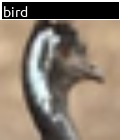

In [87]:
to_pil_image(out[4])

## exp

In [36]:
import torch
from torch import nn
from torch import einsum

In [37]:
ip = torch.rand([2, 3, 32, 32])

In [38]:
ip2 = torch.rand([2, 32, 64, 64])

In [39]:
blk1 = nn.Sequential(
    nn.Conv2d(32, 128, kernel_size=3, stride=1, padding=1),
)

In [40]:
blk2 = nn.Sequential(
    nn.Conv2d(32, 16, kernel_size=1, stride=1, padding=0),
    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.Conv2d(16, 128, kernel_size=1, stride=1, padding=0),
)

In [41]:
from object_detection_impl.utils.ml import count_parameters

In [42]:
count_parameters(blk1)

36992

In [43]:
blk2(ip2).shape

torch.Size([2, 128, 64, 64])

In [44]:
count_parameters(blk2)

5024

In [11]:
from object_detection_impl.models.nets.base import ClfModel

In [12]:
cfg = load_config()

{'hydra': {'run': {'dir': 'outputs/${now:%Y-%m-%d_%H-%M-%S}'}, 'sweep': {'dir': 'outputs/${now:%Y-%m-%d_%H-%M-%S}', 'subdir': '${now:%Y-%m-%d_%H-%M-%S}_${hydra.job.num}'}, 'launcher': {'_target_': 'hydra._internal.core_plugins.basic_launcher.BasicLauncher'}, 'sweeper': {'_target_': 'hydra._internal.core_plugins.basic_sweeper.BasicSweeper', 'max_batch_size': None, 'params': None}, 'help': {'app_name': '${hydra.job.name}', 'header': '${hydra.help.app_name} is powered by Hydra.\n', 'footer': 'Powered by Hydra (https://hydra.cc)\nUse --hydra-help to view Hydra specific help\n', 'template': '${hydra.help.header}\n== Configuration groups ==\nCompose your configuration from those groups (group=option)\n\n$APP_CONFIG_GROUPS\n\n== Config ==\nOverride anything in the config (foo.bar=value)\n\n$CONFIG\n\n${hydra.help.footer}\n'}, 'hydra_help': {'template': "Hydra (${hydra.runtime.version})\nSee https://hydra.cc for more info.\n\n== Flags ==\n$FLAGS_HELP\n\n== Configuration groups ==\nCompose your

In [13]:
cfg.model.layers.t1[-1]

[16, 16]

In [14]:
model = ClfModel(cfg)

In [16]:
model

resnet18(
  (block): Sequential(
    (s1): Sequential(
      (0): ResNetBlock(
        (block): Sequential(
          (0): ScaledResidual(
            (shortcut): Shortcut3x3Layer(
              (shortcut): ConvLayer(
                (block): Sequential(
                  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
                  (1): NormAct(
                    (block): Sequential(
                      (0): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                      (1): Identity()
                    )
                  )
                )
              )
            )
            (residual): Sequential(
              (0): BottleneckLayer(
                (0): ConvLayer(
                  (block): Sequential(
                    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
                    (1): NormAct(
                      (block): Sequential(
                        (0): BatchNorm2d(16

In [15]:
model.block.t5.output_shape

torch.Size([64, 8, 8])

In [64]:
model

ClfModel(
  (block): Sequential(
    (s1): Sequential(
      (0): ConvMpPatch(
        (block): Sequential(
          (0): ConvLayer(
            (block): Sequential(
              (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
              (1): NormAct(
                (block): Sequential(
                  (0): Identity()
                  (1): Identity()
                )
              )
            )
          )
          (1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        )
      )
    )
    (s2): Sequential(
      (0): ConvMpPatch(
        (block): Sequential(
          (0): ConvLayer(
            (block): Sequential(
              (0): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
              (1): NormAct(
                (block): Sequential(
                  (0): Identity()
                  (1): Identity()
                )
              )
            )
          )
          (1): MaxPool2d(kernel_s

In [103]:
model(torch.zeros([1, 3, 32, 32])).shape

torch.Size([1, 10])

In [84]:
model(torch.zeros([1, 3, 32, 32])).shape

torch.Size([1, 128, 4, 4])

In [25]:
model.block.h1.output_shape

torch.Size([10])

In [26]:
model(ip).shape

torch.Size([2, 10])

In [199]:
model.block.t1.output_shape

torch.Size([64, 256])

In [46]:
l = T2TPatch(8, 12, [3, 3], [1, 2], 32)

Reloading 'object_detection_impl.models.stems.patch'.


In [28]:
from collections import OrderedDict

In [29]:
dct = OrderedDict()

In [31]:
dct["cas"] = 33

In [32]:
dct

OrderedDict([('cas', 33)])

In [47]:
l

T2TPatch(
  (block): Sequential(
    (0): SoftSplit(
      (block): Sequential(
        (0): Unfold(kernel_size=3, dilation=1, padding=1, stride=1)
        (1): Rearrange('n c p -> n p c')
        (2): Identity()
      )
    )
    (1): T2TBlock(
      (0): TransformerEncoder(
        (block): Sequential(
          (0): ScaledResidual(
            (shortcut): Identity()
            (residual): Sequential(
              (0): MultiHeadSA(
                (stem): FlattenLayer(
                  (block): ApplyNorm(
                    (0): LayerNorm((72,), eps=1e-05, elementwise_affine=True)
                    (1): Identity()
                  )
                )
                (mha): MultiheadAttention(
                  (out_proj): NonDynamicallyQuantizableLinear(in_features=72, out_features=72, bias=True)
                )
              )
            )
          )
          (1): ScaledResidual(
            (shortcut): Identity()
            (residual): Sequential(
              (0): Ex

In [48]:
l(ip).shape

torch.Size([2, 12, 16, 16])

In [20]:
l = ResNeXtBlock(8, 4, stride=2)

Reloading 'object_detection_impl.models.blocks.core'.


In [21]:
l(ip).shape

torch.Size([2, 8, 16, 16])

In [203]:
l = BasicFCLayer(32, 64, norm="bn1d")

In [204]:
l

BasicFCLayer(
  (block): ApplyNorm(
    (0): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Sequential(
      (0): Linear(in_features=32, out_features=64, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.0, inplace=False)
    )
  )
)

In [205]:
l(ip).shape

RuntimeError: running_mean should contain 3 elements not 32

In [100]:
Norms["ln"](32).create()

LayerNorm((32,), eps=1e-05, elementwise_affine=True)

In [102]:
Norms["ln"](54)

Reloading 'object_detection_impl.models.blocks.core'.
Reloading 'object_detection_impl.models.constants'.


<Norms.ln: <class 'torch.nn.modules.normalization.LayerNorm'>>

In [79]:
Norms["ln"].create()

LayerNorm((64,), eps=1e-05, elementwise_affine=True)

In [78]:
Norms["ln"](64).create()

LayerNorm((64,), eps=1e-05, elementwise_affine=True)

In [69]:
n1.create(32, 1e-3)

LayerNorm((32,), eps=0.001, elementwise_affine=True)

In [39]:
from object_detection_impl.models.blocks.composites import TransformerEncoder

In [40]:
blk = TransformerEncoder(16)

In [41]:
out = blk(ip)

In [51]:
from object_detection_impl.models.nets.vit import ViTTiny
from object_detection_impl.models.nets.convmixer import ConvMixerTiny
from object_detection_impl.models.blocks.attentions import LearnablePositionEnc
from object_detection_impl.models.nets.t2t import T2TViT

Reloading 'object_detection_impl.models.nets.t2t'.
Reloading 'object_detection_impl.models.nets.vit'.


In [52]:
cfg = load_config()

{'general': {'logs_folder_name': 'logs', 'root_dir': '/home/ajkdrag/workspace/projects/object-detection-impl/experiments', 'workspace': 'ajkdrag', 'project_name': 'od-impl', 'device': 'cuda', 'exp_name': '${datamodule.dataset.name}'}, 'datamodule': {'path': '/home/ajkdrag/workspace/projects/object-detection-impl/data/cifar10', 'class_name': 'datamodules.tv_clf_dm.TorchvisionClfDatamodule', 'dataset': {'class_name': 'datasets.tv_clf_ds.TorchvisionClfDataset', 'name': 'CIFAR10', 'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2471, 0.2435, 0.2616], 'n_classes': 10}, 'num_workers': 2, 'batch_size': '${training.bs}', 'test_batch_size': 32, 'pin_memory': True, 'splits': [0.7, 0.3]}, 'augmentation': {'train': [{'class_name': 'albumentations.RandomResizedCrop', 'params': {'height': '${model.input_size}', 'width': '${model.input_size}', 'scale': [0.75, 1], 'ratio': [0.75, 1.2], 'p': 0.5}}, {'class_name': 'albumentations.HorizontalFlip', 'params': {'p': 0.5}}, {'class_name': 'albumentations.ShiftSc

In [57]:
blk = T2TViT(cfg, image_size=32)

Reloading 'object_detection_impl.models.nets.t2t'.


In [58]:
blk

T2TViT(
  (to_patch_embedding): Sequential(
    (0): Identity()
    (1): Unfold(kernel_size=3, dilation=1, padding=1, stride=2)
    (2): Rearrange('b c n -> b n c')
    (3): Transformer(
      (norm): LayerNorm((27,), eps=1e-05, elementwise_affine=True)
      (layers): ModuleList(
        (0): ModuleList(
          (0): Attention(
            (norm): LayerNorm((27,), eps=1e-05, elementwise_affine=True)
            (attend): Softmax(dim=-1)
            (dropout): Dropout(p=0.0, inplace=False)
            (to_qkv): Linear(in_features=27, out_features=81, bias=False)
            (to_out): Identity()
          )
          (1): FeedForward(
            (net): Sequential(
              (0): LayerNorm((27,), eps=1e-05, elementwise_affine=True)
              (1): Linear(in_features=27, out_features=27, bias=True)
              (2): GELU(approximate='none')
              (3): Dropout(p=0.0, inplace=False)
              (4): Linear(in_features=27, out_features=27, bias=True)
              (5): D

In [49]:
x = blk(ip)

In [50]:
x.shape

torch.Size([2, 10])

In [48]:
ip.shape

torch.Size([2, 3, 32, 32])

In [157]:
out_ = blk(ip)

torch.Size([2, 961])


In [158]:
out_.shape

torch.Size([2, 10])

In [163]:
from object_detection_impl.models.nets.default import DefaultNet
from object_detection_impl.datamodules.tv_clf_dm import TorchvisionClfDatamodule
from object_detection_impl.lit_models.image_clf import LitImageClassifier
from object_detection_impl.callbacks.vis_dls import VisualizeDlsCallback

Reloading 'object_detection_impl.models.nets.convmixer'.


In [164]:
from torchvision import transforms

In [165]:
cifar10_mean = (0.4914, 0.4822, 0.4465)
cifar10_std = (0.2471, 0.2435, 0.2616)

In [166]:
import torch

In [167]:
ip = torch.rand(2, 3, 32, 32)

In [301]:
cb = VisualizeDlsCallback(scale=4)

In [315]:
cfg = load_config()

{'general': {'logs_folder_name': 'logs', 'root_dir': '/home/ajkdrag/workspace/projects/object-detection-impl/experiments', 'workspace': 'ajkdrag', 'project_name': 'od-impl', 'device': 'cuda', 'exp_name': '${datamodule.dataset.name}'}, 'datamodule': {'path': '/home/ajkdrag/workspace/projects/object-detection-impl/data/cifar10', 'class_name': 'datamodules.tv_clf_dm.TorchvisionClfDatamodule', 'dataset': {'class_name': 'datasets.tv_clf_ds.TorchvisionClfDataset', 'name': 'CIFAR10', 'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2471, 0.2435, 0.2616], 'n_classes': 10}, 'num_workers': 2, 'batch_size': '${training.bs}', 'test_batch_size': 32, 'pin_memory': True, 'splits': [0.7, 0.3]}, 'augmentation': {'train': [{'class_name': 'albumentations.RandomResizedCrop', 'params': {'height': '${model.input_size}', 'width': '${model.input_size}', 'scale': [0.65, 1], 'ratio': [0.65, 1.33], 'p': 0.5}}, {'class_name': 'albumentations.HorizontalFlip', 'params': {'p': 0.5}}, {'class_name': 'albumentations.ShiftS

In [316]:
dm = TorchvisionClfDatamodule(cfg)

In [317]:
dm.setup()

2024-06-12T07:14:32.500452Z [info     ] train_dataset size: 35000      func_name=setup lineno=77
2024-06-12T07:14:32.507075Z [info     ] val_dataset size: 15000        func_name=setup lineno=78


In [318]:
dm.prepare_data()

Files already downloaded and verified
Files already downloaded and verified


In [319]:
test_dls = dm.train_dataloader()

In [323]:
first = next(iter(test_dls))

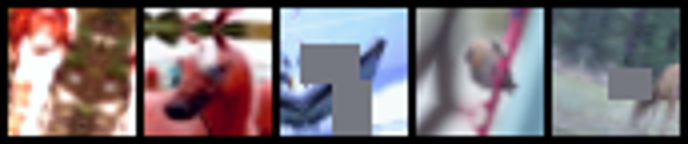

In [324]:
cb._make_grid(first['image'][:5], fp=None, normalize=True, save=False,)

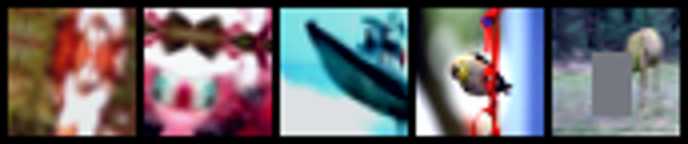

In [322]:
cb._make_grid(first['image'][:5], fp=None, normalize=True, save=False)

In [151]:
model_ = LeNetV6(cfg)

256


In [152]:
model_.stem(ip).shape

torch.Size([2, 128, 16, 16])

In [153]:
model_(ip).shape

torch.Size([2, 10])

In [116]:
blk = PatchStem(3, 16, 4, use_conv=True)

In [117]:
out = blk(ip)

In [145]:
out.shape

torch.Size([2, 16, 8, 8])

In [144]:
mixer = MLPMixerBlock(128, 64)

In [149]:
torch.randn([2, 128, 16, 16]).shape

torch.Size([2, 128, 16, 16])

In [148]:
mout = mixer(torch.randn([2, 128, 16, 16]))

RuntimeError: Given normalized_shape=[16], expected input with shape [*, 16], but got input of size[2, 256, 128]

In [147]:
mout.shape

torch.Size([2, 16, 8, 8])

In [129]:
cfg.model.stem.params.get("patch_siz", 3)

3